# **V - Model Development**

We now start the model development phase, were we will get our first predictions, to try to predict which teams will go to the Playoffs in year 10.

## **V.1 Import Libraries and Load Data**

We start by importing all the necessary files to be used in the models predictions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

awards_players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv')
coaches_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv')
players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv')
players_teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv')
series_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv')
teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv')
teams_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv')

## **V.2 - Obtain data from only 9 years**

We need to only obtain data from 9 years, because we want to use these years (1-9) as our training data for the models. Year 10 will be then used to verify if we actually predicted the playoff teams correctly using the historical data we have available. 

This way we keep a clear separation between training and testing data. 

In [2]:
awards_players_model = awards_players_cleaned[awards_players_cleaned['year'] != 10]
coaches_model = coaches_cleaned[coaches_cleaned['year'] != 10]
players_teams_model = players_teams_cleaned[players_teams_cleaned['year'] != 10]
series_post_model = series_post_cleaned[series_post_cleaned['year'] != 10]
teams_model = teams_cleaned[teams_cleaned['year'] != 10]
teams_post_model = teams_post_cleaned[teams_post_cleaned['year'] != 10]

os.makedirs('../data/basketballPlayoffs_model', exist_ok=True)

for df, name in [(awards_players_model, 'awards'), 
                 (coaches_model, 'coaches'),
                 (players_teams_model, 'players'),
                 (series_post_model, 'series'),
                 (teams_model, 'teams'),
                 (teams_post_model, 'teams_post')]:
    if df['year'].max() != 9:
        print(f"Warning: {name} contains data beyond year 9")

awards_players_model.to_csv('../data/basketballPlayoffs_model/awards_players_model.csv', index=False)
coaches_model.to_csv('../data/basketballPlayoffs_model/coaches_model.csv', index=False)
players_cleaned.to_csv('../data/basketballPlayoffs_model/players_model.csv', index=False)
players_teams_model.to_csv('../data/basketballPlayoffs_model/players_teams_model.csv', index=False)
series_post_model.to_csv('../data/basketballPlayoffs_model/series_post_model.csv', index=False)
teams_model.to_csv('../data/basketballPlayoffs_model/teams_model.csv', index=False)
teams_post_model.to_csv('../data/basketballPlayoffs_model/teams_post_model.csv', index=False)

### **V.2.1 - Overalls from only 9 years**

In [3]:
players_overall_avg = players_teams_model.groupby('playerID')['OVERALL'].mean().reset_index()

players_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

players_overall_avg['OVERALL_ALL_TIME'] = players_overall_avg['OVERALL_ALL_TIME'].round(1)

players_overall_avg.to_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv', index=False)

In [4]:
rookie_players = players_teams_model[players_teams_model['is_rookie'] == 1]

rookie_overall_avg = rookie_players['OVERALL'].mean().round(1)

rookie_overall_avg_df = pd.DataFrame({'rookie_overall_avg': [rookie_overall_avg]})

rookie_overall_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_avg_model.csv', index=False)

In [5]:
rookie_coaches = coaches_model[coaches_model['is_rookie'] == 1]

rookie_overall_coaches_avg = rookie_coaches['OVERALL'].mean().round(1)

rookie_overall_coaches_avg_df = pd.DataFrame({'rookie_overall_coaches_avg': [rookie_overall_coaches_avg]})

rookie_overall_coaches_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_coaches_avg_model.csv', index=False)

In [6]:
coaches_overall_avg = coaches_model.groupby('coachID')['OVERALL'].mean().reset_index()

coaches_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

coaches_overall_avg['OVERALL_ALL_TIME'] = coaches_overall_avg['OVERALL_ALL_TIME'].round(1)

coaches_overall_avg.to_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv', index=False)

### **V.2.2 - Obtain ranks from the 10th year to compare**

After separating our training data (years 1-9), we need to obtain the actual playoff results from year 10 to evaluate our model's predictions.

We use year 10 data to validate how well our different models performed in predicting playoffs teams. 

In [7]:
playoffs_10th_year = teams_cleaned[teams_cleaned['year'] == 10][['tmID', 'playoff']]

playoffs_10th_year.to_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv', index=False)

### **V.2.3 - Obtain teams line up and coach from the 10th year**

In [8]:
coaches_model_10th_year = coaches_cleaned[coaches_cleaned['year'] == 10][['coachID', 'tmID',]]

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)

In [9]:
players_model_10th_year = players_teams_cleaned[players_teams_cleaned['year'] == 10][['playerID','tmID']]

players_model_10th_year = players_model_10th_year.sort_values(by='tmID')

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

### **V.2.4 - Add overalls calculated from 9 years to the 10th year players and coach**

In [10]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')
players_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv')

rookie_avg = 5.6 

players_model_10th_year = players_model_10th_year.merge(
    players_overall_all_time_model[['playerID', 'OVERALL_ALL_TIME']],
    on='playerID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg})

players_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

In [11]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')
coaches_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv')

rookie_avg_coach = 8.9 

coaches_model_10th_year = coaches_model_10th_year.merge(
    coaches_overall_all_time_model[['coachID', 'OVERALL_ALL_TIME']],
    on='coachID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg_coach})

coaches_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)


### **V.2.5 - Given the teams players composition and their respective overalls calculate the team overall (mean of all players)**

Using the player lineups and their respective overalls, we decided to create a team_overall that summarizes the average overall of each team.

In [12]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')

team_overall = players_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall['overall_team'] = team_overall['OVERALL'].round(1)

team_overall = team_overall.drop(columns=['OVERALL'])

team_overall.to_csv('../data/basketballPlayoffs_model/team_overall.csv', index=False)

###  **V.2.6 - Given the team coaches and their respective overalls calculate the coach overall (mean of all coaches(1 or more than 1))**

We did the same for coaches, as a team may have had more than one coach throughout the year.

In [13]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')

team_overall_coaches = coaches_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall_coaches['overall_team_coach'] = team_overall_coaches['OVERALL'].round(1)

team_overall_coaches = team_overall_coaches.drop(columns=['OVERALL'])

team_overall_coaches.to_csv('../data/basketballPlayoffs_model/team_overall_coaches.csv', index=False)

## **V.3 - Models**

We implemented five different machine learning models to predict playoff qualification:

#### Classification Models
- **Support Vector Machine (SVM)**: For non-linear classification using RBF kernel
- **Decision Tree**: For interpretable decision rules with controlled depth
- **Random Forest**: Ensemble method with multiple decision trees
- **K-Nearest Neighbors (KNN)**: Instance-based learning with k=7
- **Logistic Regression**: For probability-based classification

#### Implementation Features
- All models trained on years 1-9


#### Team Performance Metrics:

- Win/Loss records
- Offensive/Defensive points
- Rebound statistics

#### Historical Data:

- 3-year rolling averages for wins
- Previous playoff appearances
- Points differential trends

#### Player Statistics:

- Overall player ratings
- Offensive/Defensive capabilities
- Stamina metrics
- Team roster strength

#### Coaching Impact:

- Coach overall ratings
- Team management scores

Preparing training data...
Preparing test data...

Model Performance:
-----------------

SVM:
Training Metrics (Years 1-9):
Training Accuracy: 73.39%
Training F1 Score: 0.79
Training Precision: 0.74
Training Recall: 0.84

Sum of probabilities: 8.00
Test Accuracy (Year 10): 62.50%
Prediction Error: 5.86

Team Predictions (1 = Playoff, 0 = No Playoff):
Team 0: Probability = 0.56, Predicted = 0, Actual = 1
Team 2: Probability = 0.55, Predicted = 0, Actual = 0
Team 4: Probability = 0.63, Predicted = 1, Actual = 0
Team 5: Probability = 0.72, Predicted = 1, Actual = 1
Team 7: Probability = 0.76, Predicted = 1, Actual = 1
Team 8: Probability = 0.62, Predicted = 1, Actual = 1
Team 10: Probability = 0.54, Predicted = 0, Actual = 0
Team 11: Probability = 0.63, Predicted = 1, Actual = 0
Team 13: Probability = 0.55, Predicted = 0, Actual = 1
Team 15: Probability = 0.59, Predicted = 1, Actual = 0
Team 16: Probability = 0.60, Predicted = 1, Actual = 1
Team 17: Probability = 0.67, Predicted = 1, Actu

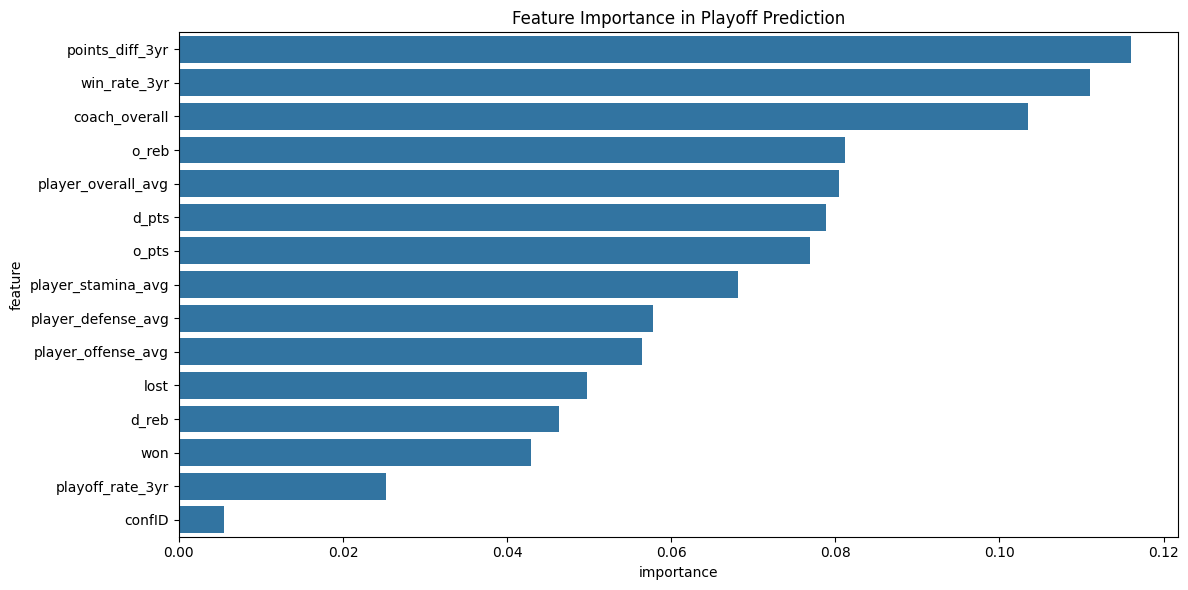

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

def create_features_for_team(team_data, teams_history, players_teams_data, coaches_data, year):
   features = {
       'won': team_data['won'],
       'lost': team_data['lost'],
       'o_pts': team_data['o_pts'],
       'd_pts': team_data['d_pts'],
       'o_reb': team_data['o_reb'],
       'd_reb': team_data['d_reb'],
       'confID': team_data['confID']
   }
   
   team_history_data = teams_history[
       (teams_history['tmID'] == team_data['tmID']) & 
       (teams_history['year'] <= year)
   ].sort_values('year')
   
   features['win_rate_3yr'] = team_history_data['won'].tail(3).mean()
   features['playoff_rate_3yr'] = team_history_data['playoff'].tail(3).mean()
   features['points_diff_3yr'] = (team_history_data['o_pts'] - team_history_data['d_pts']).tail(3).mean()
   
   team_players = players_teams_data[
       (players_teams_data['year'] == year) & 
       (players_teams_data['tmID'] == team_data['tmID'])
   ]
   features['player_overall_avg'] = team_players['OVERALL'].mean()
   features['player_stamina_avg'] = team_players['overallSTAMINA'].mean()
   features['player_defense_avg'] = team_players['overallDEFENSE'].mean()
   features['player_offense_avg'] = team_players['overallOFFENSE'].mean()
   
   team_coach = coaches_data[
       (coaches_data['year'] == year) & 
       (coaches_data['tmID'] == team_data['tmID'])
   ]
   features['coach_overall'] = team_coach['OVERALL'].mean() if len(team_coach) > 0 else 0
   
   return list(features.values())

print("Preparing training data...")
X_train = []
y_train = []

for year in range(1, 10):
   current_year_teams = teams_model[teams_model['year'] == year]
   next_year_teams = teams_model[teams_model['year'] == year + 1]
   
   for _, team in current_year_teams.iterrows():
       if team['tmID'] in next_year_teams['tmID'].values:
           features = create_features_for_team(team, teams_model, players_teams_model, coaches_model, year)
           X_train.append(features)
           
           next_year_playoff = next_year_teams[next_year_teams['tmID'] == team['tmID']]['playoff'].iloc[0]
           y_train.append(next_year_playoff)

X_train = np.array(X_train)
y_train = np.array(y_train)

print("Preparing test data...")
X_test = []
year_10_teams = teams_cleaned[teams_cleaned['year'] == 10]
for _, team in year_10_teams.iterrows():
   features = create_features_for_team(team, teams_cleaned, players_teams_cleaned, coaches_cleaned, 10)
   X_test.append(features)

X_test = np.array(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
   'SVM': SVC(kernel='rbf', probability=True, C=0.5, random_state=42),
   'Decision Tree': DecisionTreeClassifier(
       max_depth=3,
       min_samples_leaf=4,
       random_state=42
   ),
   'Random Forest': RandomForestClassifier(
       n_estimators=100,
       max_depth=5,
       min_samples_split=5,
       random_state=42
   ),
   'Logistic Regression': LogisticRegression(
       C=0.8,
       max_iter=1000, 
       random_state=42
   ),
   'KNN': KNeighborsClassifier(n_neighbors=7)
}

model_predictions = {}
print("\nModel Performance:")
print("-----------------")

for name, model in models.items():
   model.fit(X_train_scaled, y_train)
   
   y_train_pred = model.predict(X_train_scaled)
   train_accuracy = accuracy_score(y_train, y_train_pred) * 100
   train_f1 = f1_score(y_train, y_train_pred)
   train_precision = precision_score(y_train, y_train_pred)
   train_recall = recall_score(y_train, y_train_pred)
   
   print(f"\n{name}:")
   print(f"Training Metrics (Years 1-9):")
   print(f"Training Accuracy: {train_accuracy:.2f}%")
   print(f"Training F1 Score: {train_f1:.2f}")
   print(f"Training Precision: {train_precision:.2f}")
   print(f"Training Recall: {train_recall:.2f}")
   
   probs = model.predict_proba(X_test_scaled)[:, 1]
   
   probs_adjusted = 8 * probs / np.sum(probs)

   print(f"\nSum of probabilities: {np.sum(probs_adjusted):.2f}")
   if not np.isclose(np.sum(probs_adjusted), 8.0, rtol=1e-10):
       print("Warning: Probabilities don't sum to exactly 8")
   
   pred_df = pd.DataFrame({
       'tmID': year_10_teams['tmID'],
       'confID': year_10_teams['confID'],
       'playoff_prob': probs_adjusted  
   })
   
   predictions = []
   for conf in [0, 1]:
       conf_teams = pred_df[pred_df['confID'] == conf].nlargest(4, 'playoff_prob')
       predictions.extend(conf_teams['tmID'].tolist())
   
   actual_playoff_teams = playoffs_10th_year[playoffs_10th_year['playoff'] == 1]['tmID'].tolist()
   correct = len(set(predictions) & set(actual_playoff_teams))
   test_accuracy = (correct / len(predictions)) * 100
   
   actual_labels = np.array([1 if tmID in actual_playoff_teams else 0 for tmID in year_10_teams['tmID']])
   prediction_error = np.sum(np.abs(probs_adjusted - actual_labels))
   
   print(f"Test Accuracy (Year 10): {test_accuracy:.2f}%")
   print(f"Prediction Error: {prediction_error:.2f}")
   print("\nTeam Predictions (1 = Playoff, 0 = No Playoff):")
   for tmID, prob in zip(year_10_teams['tmID'], probs_adjusted):
       playoff_status = 1 if tmID in predictions else 0
       actual_status = 1 if tmID in actual_playoff_teams else 0
       print(f"Team {tmID}: Probability = {prob:.2f}, Predicted = {playoff_status}, Actual = {actual_status}")
   
   model_predictions[name] = {
       'training_accuracy': train_accuracy,
       'training_f1': train_f1,
       'training_precision': train_precision,
       'training_recall': train_recall,
       'test_accuracy': test_accuracy,
       'prediction_error': prediction_error,
       'predictions': predictions,
       'probabilities': dict(zip(year_10_teams['tmID'], probs_adjusted))
   }

best_model = max(model_predictions.items(), key=lambda x: x[1]['test_accuracy'])
print(f"\nBest Model: {best_model[0]}")
print(f"Training Accuracy: {best_model[1]['training_accuracy']:.2f}%")
print(f"Test Accuracy: {best_model[1]['test_accuracy']:.2f}%")
print(f"Prediction Error: {best_model[1]['prediction_error']:.2f}")

rf_model = models['Random Forest']
feature_names = ['won', 'lost', 'o_pts', 'd_pts', 'o_reb', 'd_reb', 'confID', 
               'win_rate_3yr', 'playoff_rate_3yr', 'points_diff_3yr',
               'player_overall_avg', 'player_stamina_avg', 'player_defense_avg', 
               'player_offense_avg', 'coach_overall']

feature_importance = pd.DataFrame({
   'feature': feature_names,
   'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

results = {
   'model_predictions': model_predictions,
   'best_model': {
       'name': best_model[0],
       'training_accuracy': best_model[1]['training_accuracy'],
       'test_accuracy': best_model[1]['test_accuracy'],
       'prediction_error': best_model[1]['prediction_error'],
       'predictions': best_model[1]['predictions']
   }
}

pd.DataFrame([results]).to_csv('../data/basketballPlayoffs_model/ml_model_results.csv', index=False)
feature_importance.to_csv('../data/basketballPlayoffs_model/feature_importance.csv', index=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Playoff Prediction')
plt.tight_layout()
plt.show()

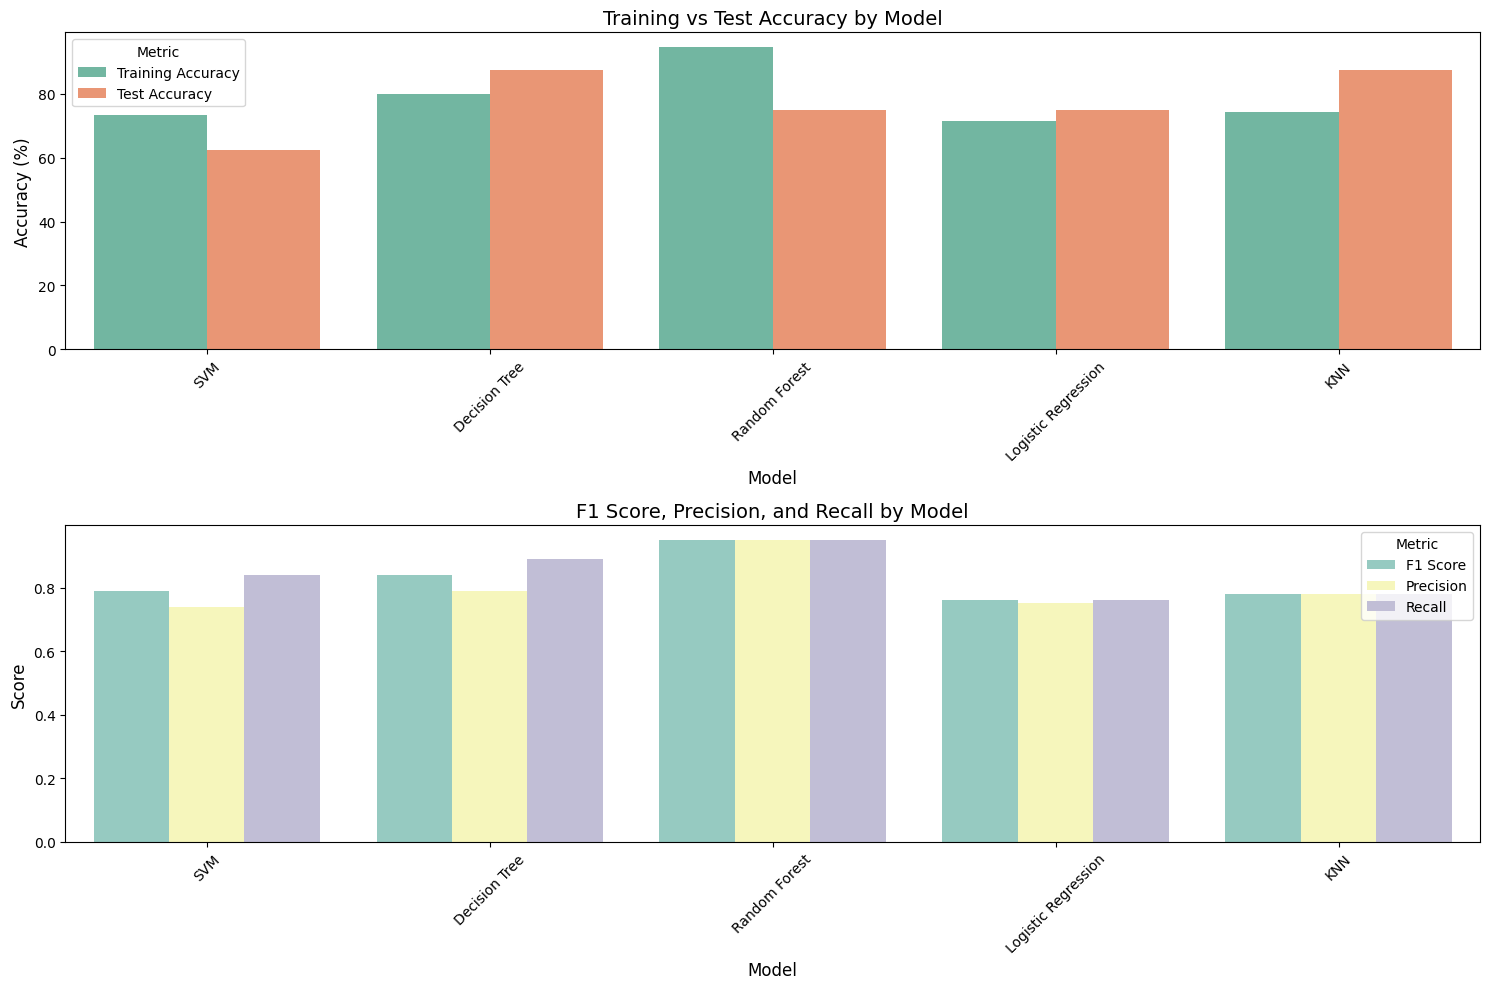

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics_data = {
    'Model': ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN'] * 5,
    'Metric': (['Training Accuracy'] * 5 + ['Test Accuracy'] * 5 + 
               ['F1 Score'] * 5 + ['Precision'] * 5 + ['Recall'] * 5),
    'Value': [
        73.39, 79.82, 94.50, 71.56, 74.31,
        62.50, 87.50, 75.00, 75.00, 87.50,
        0.79, 0.84, 0.95, 0.76, 0.78,
        0.74, 0.79, 0.95, 0.75, 0.78,
        0.84, 0.89, 0.95, 0.76, 0.78
    ]
}

df_metrics = pd.DataFrame(metrics_data)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
accuracy_data = df_metrics[df_metrics['Metric'].isin(['Training Accuracy', 'Test Accuracy'])]
sns.barplot(data=accuracy_data, x='Model', y='Value', hue='Metric', palette='Set2', errorbar=None)
plt.title('Training vs Test Accuracy by Model', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric')

plt.subplot(2, 1, 2)
other_metrics = df_metrics[df_metrics['Metric'].isin(['F1 Score', 'Precision', 'Recall'])]
sns.barplot(data=other_metrics, x='Model', y='Value', hue='Metric', palette='Set3', errorbar=None)
plt.title('F1 Score, Precision, and Recall by Model', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric')

plt.tight_layout()
plt.show()

Decision Tree model appears to be the best overall performer.

- It achieved the highest test accuracy (87.50%) tied with KNN
- It had solid training metrics

While the Random Forest had higher training metrics (94.50% training accuracy), it showed signs of overfitting as its test accuracy dropped to 75.00%. The Decision Tree maintained better consistency between training and test performance.